-03-Basics-of-Statistical-Distributions-and-Analysis © by A.Richter
---

Import of modules and libraries...

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

import scipy as sp
import scipy.stats as sts
import pandas as pd
import skimage.io as skio
import glob
%matplotlib inline

Basics of Error Types
---

The task of a (physical) measurement is to determine the value of a physical quantity (length, velocity, concentration,...)

On the one hand human senses are limited and on the other hand every measurement is exposed to the
(sometimes non-controllable) influences of it's nearby environment. This is why measuring results **x** tend to vary from its error-free but always unknown true Value **X** of the physical quantity.


We distinguish between gross, systemstic and random errors

A **gross error (Blunder)** is for example ...

Systematische Fehler haben ihre Ursachen im Mess-System. Sie sind reproduzierbar und treten bei Wiederholung in gleicher Richtung und Gro ̈ße auf. Beispiele dafu ̈r sind falsch geeichte Skalen, verschobene Null-Stellungen an Messinstrumenten oder La ̈ngena ̈nderun- gen von Skalen durch die Temperatur der Umgebung. Diese Art der Fehler kann durch Kontrolle und Verbesserung der Apparatur beseitigt bzw. verkleinert werden.

A **systematic error** is when two people meassure a distance between the same points and want to compare

their meassuerements afterwards. One of them uses a metric sclae and the other one uses a foot scale.,

Their results won't fit

A **random error**...
Zufa ̈llige Fehler lassen sich im Gegensatz dazu grundsa ̈tzlich nicht vermeiden. Innerhalb einer Messreihe unterscheiden sie sich nach Gro ̈ße und Betrag. Sie ko ̈nnen durch Wieder- holung der Messung auf ein vernu ̈nftiges Maß gebracht und, was hier besonders wichtig ist, mathematisch oder durch Abscha ̈tzen bestimmt werden.

**Statistical-Distributions**
---

The analysis of statistical distributions of datasets is a basic tool for data analysts.

a very basic distribution is the uniform dist. (german Gleichverteilung). Numeric Python offers the function **random.rand()** to generate uniformly distributed numbers. The following diagrams will proide a visual impression about this form of distribution. Try it yourself with a increasing number of n.

Equal or **uniform distribution** : Random numbers between 0 and 1
---

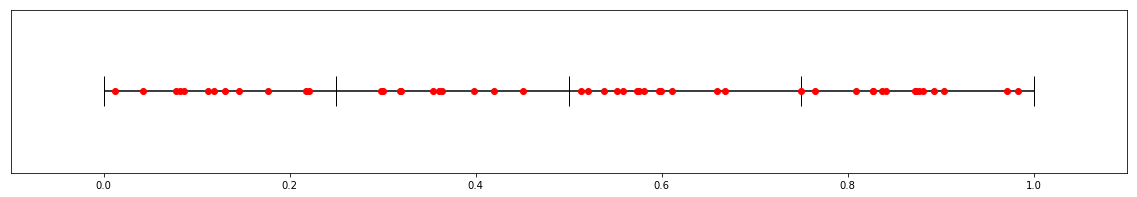

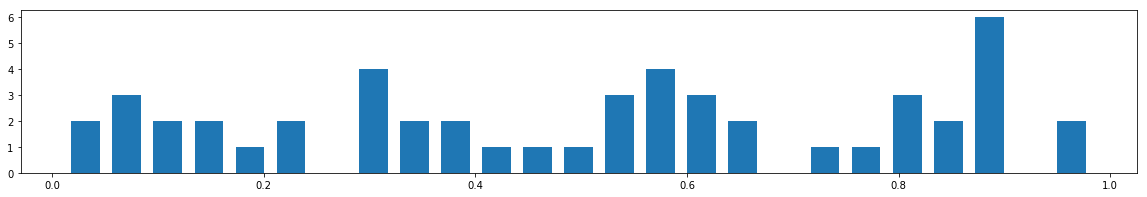

In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
n=50  # n=100 #n=1000 #n=10000      #change number "n" 
Nums=np.random.rand(n)
#print Nums
a=np.arange(0,1.25,0.25)            # make all 0.25 units a vertical dash
y=np.zeros(a.shape)
fig=plt.figure(figsize=(20,3))
plt.plot(a,y,'k|',ms = 30)          # plot verticale dashes in the Graphic 

plt.hlines(0,0,1)
plt.plot(Nums,np.zeros((n)),'ro')   # plotten r=red   o = big filled Point   .= small filled Point
plt.xlim(-0.1,1.1)
plt.ylim(-0.5,0.5)
plt.yticks([])                     # no y-Axis Annotations
plt.show()

fig=plt.figure(figsize=(20,3))
hist, bins = np.histogram(Nums, bins=25)         #Number of Intervalls, change "bins" 
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.show()

But measured data is in general much more complex as nature loves to generate complexity based on very simple rules

**Standard Normal distribution (Gaussian Distribution)**: random numbers with Mean = 0 and Standarddeviation = 1
---

The gaussian or normal distribution is one of the most important ones. It was published by **Carl Friedrich Gauss in 1809** "Theoria motus corporum coelestium in sectionibus conicis solem ambientium" (dt.: Theorie der Bewegung der in Kegelschnitten sich um die Sonne bewegenden Himmelskörper)
which defined the **Normal Distribution** just next to the **Least Squares Method** and the **Maximum-Likelihood-Estimation**

the mathematical function is shown here:

$ P(x|\mu, \sigma) = \frac{1}{{\sigma \sqrt {2\pi } }}e^{ -\frac{ (x - \mu )^2}  {2\sigma^2 }  }$

https://de.wikipedia.org/wiki/Normalverteilung

$ X \sim \mathcal{N}(\mu,\,\sigma^{2})\,.$



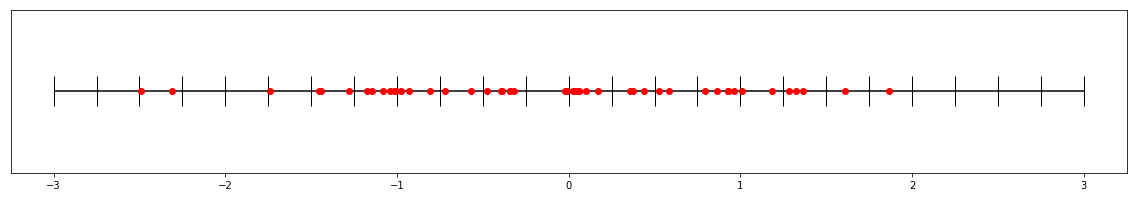

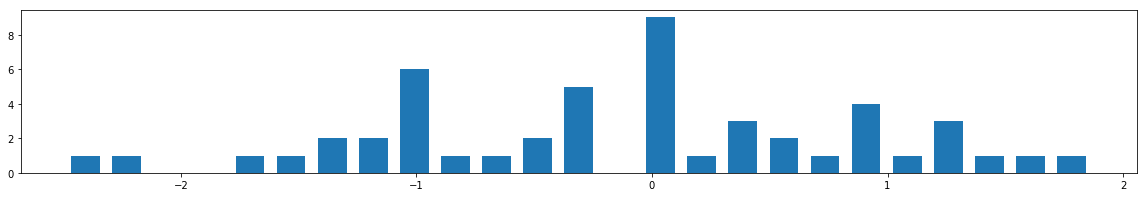

In [9]:
#import numpy as np
#import matplotlib.pyplot as plt
#%matplotlib inline

n=50 # n=100 #n=1000 #n=10000               #Anzahl der Ziehungen "n" verändern
Nums=np.random.randn(n)               # Unterschied!!! : randn() statt rand()
#print Nums
a=np.arange(-3,3.25,0.25)
y=np.zeros(a.shape)
fig=plt.figure(figsize=(20,3))
plt.plot(a,y,'k|',ms = 30)

plt.hlines(0,-3,3)
plt.plot(Nums,np.zeros((n)),'ro')
plt.xlim(-3.25,3.25)
plt.ylim(-0.5,0.5)
plt.yticks([])
plt.show()

fig=plt.figure(figsize=(20,3))
hist, bins = np.histogram(Nums, bins=25)          #Anzahl der Intervalle "bins" verändern
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.show()

Testing of normal distribution

In [ ]:
Kolmogorow-Smirnow Test (KS-Test)

Histogramms
---

Histograms are a special view on the data. You can guess what might be the underlying distribution

or you can judge by the paeks in the data if there is one or two of them\n,
or if its a good contrast in an image (all possible values are present) or low contrast (smal range), only few values are present in the image

but what you can not say is where e.g. in an Image the pixels are found(row/col)

just like before we start with random values and add an offset and multiplier

http://matplotlib.org/1.2.1/examples/pylab_examples/histogram_demo.html

https://plot.ly/matplotlib/histograms/

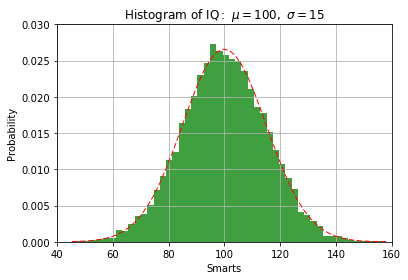

In [11]:
#Histogram mittels Funktion  plt.hist()  aus matplotlib

#import numpy as np
#import matplotlib.pyplot as plt

mu, sigma = 100, 15
x = mu + sigma*np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(x, 50, normed=1, facecolor='green', alpha=0.75)
#n, bins, patches = plt.hist(x, 50, facecolor='green', alpha=0.75)

# add a 'best fit' line
y = mlab.normpdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=1)

plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title(r'$\mathrm{Histogram\ of\ IQ:}\ \mu=100,\ \sigma=15$')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)

plt.show()
#=================================================================================


The second option to draw a histogram is based on numeric python (np) and uses less code and less complex parameters...

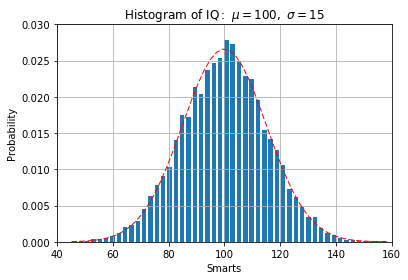

In [14]:
# 2. Möglichkeit über np.histogram()  wie in den Bsp oben schon verwendent
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

hist, bins = np.histogram(x, bins=50, normed=True)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)


# add a 'best fit' line
y = mlab.normpdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=1)

plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title(r'$\mathrm{Histogram\ of\ IQ:}\ \mu=100,\ \sigma=15$')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)

plt.show()

Analysis of Correlations
---

nach Pearson: https://de.wikipedia.org/wiki/Korrelationskoeffizient  | nach Spearman oder Kendall: https://de.wikipedia.org/wiki/Rangkorrelationskoeffizient  

**Correlation after Pearson**

In [6]:
# Pearson Correlation Coef
# scipy.stats.spearmanr()    # Spearman Correlation Coef
print('                ')
print('Create normal distributed data : ')
np.random.seed(0)
x1=np.random.randn(20,1)      # je 20 normalverteilte Zufallszahlen erzeugen für x1 und x2
x2=np.random.randn(20,1)

print('x1:', np.ravel(x1) )    # np.ravel() macht z.B. aus einem 2x2 array eine 1x4 Liste...
print( '-----------------')
print( 'x2:', np.ravel(x2))

plt.plot(x1,x2,'bo')         # plotten b=blau   o=großer ausgefüllter Punkt   .= kleiner ausgefüllter Punkt
plt.xlim(-3,25)          #Anzeigebereich festlegen
plt.ylim(-3,25)
plt.show()

print( 'Correlationsmatrix (Pearson): ')
print('                ')
print( np.corrcoef(np.ravel(x1),np.ravel(x2) ) )  # np.corrcoef() erzeugt eine 2x2 Korrelationsmatrix Element 1,2 ist der gewünschte Korrelationskoeffizient 
print( '___________________________________')
print( '                ')
pr =np.corrcoef(np.ravel(x1),np.ravel(x2) )[0,1]   # Python fängt bei 0 an zu zählen 
print(' Pearsons Correlation Coefficient: {}'.format(pr))


                
Create normal distributed data : 


NameError: name 'np' is not defined

Compare Correlations Pearson, Spearman and Kendall
---

                
Normalverteilte Daten erzeugen: 
x1: [ 1.76405235  0.40015721  0.97873798  2.2408932   1.86755799 -0.97727788
  0.95008842 -0.15135721 -0.10321885  0.4105985   0.14404357  1.45427351
  0.76103773  0.12167502  0.44386323  0.33367433  1.49407907 -0.20515826
  0.3130677  -0.85409574]
-----------------
x2: [-2.55298982  0.6536186   0.8644362  -0.74216502  2.26975462 -1.45436567
  0.04575852 -0.18718385  1.53277921  1.46935877  0.15494743  0.37816252
 -0.88778575 -1.98079647 -0.34791215  0.15634897  1.23029068  1.20237985
 -0.38732682 -0.30230275]


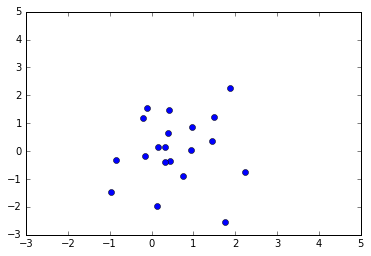

Korrelationsmatrix (Pearson): 
                
[[ 1.          0.08738675]
 [ 0.08738675  1.        ]]
___________________________________
                
 Pearsons Correlation: 0.0873867503581
Spearmans Correlation: 0.108270676692
  Kendall Correlation: 0.115789473684
_____________________________________
                


In [4]:
print( '                ')
print( 'generate Normalverteilte Data: ')
np.random.seed(0)
x1=np.random.randn(20,1)
x2=np.random.randn(20,1)

print( 'x1:', np.ravel(x1))
print( '-----------------')
print( 'x2:', np.ravel(x2))

plt.plot(x1,x2,'bo')
plt.xlim(-3,5)
plt.ylim(-3,5)
plt.show()
print( 'Correlationsmatrix (Pearson): ')
print('                ')
print( np.corrcoef(np.ravel(x1),np.ravel(x2) ))
print( '___________________________________')
print( '                ')
pr =np.corrcoef(np.ravel(x1),np.ravel(x2) )[0,1]
print( ' Pearsons Correlation: {}'.format(pr))

sr,sp = sts.spearmanr(x1,x2)

print( 'Spearmans Correlation: {}'.format(sr))

kr,kp = sts.kendalltau(x1,x2)

print( '  Kendall Correlation: {}'.format(kr))
print( '_____________________________________')
print( '                ')

Einfügen eines Fehlers (Outliner) in die Datenreihe

                
                
_____________________________________
                
Fehlerwert (Outliner) einfügen, x1[10] = 18, x2[10] = 18 : 
Korrelationsmatrix (Pearson): 
                
[[ 1.          0.93971012]
 [ 0.93971012  1.        ]]
                
 Pearsons Correlation: 0.939710118783 !!!! 1 falscher Punkt, völlig anderes Ergebnis (0.08738675 vorher)!
_____________________________________


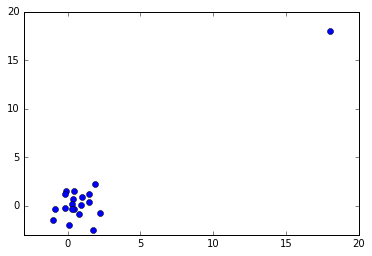

!!!ABER:                
_____________________________________
                
Spearmans Correlation: 0.233082706767
  Kendall Correlation: 0.2
                
_____________________________________


In [5]:
print '                '
print '                '
print '_____________________________________'

print '                '
print 'Fehlerwert (Outliner) einfügen, x1[10] = 18, x2[10] = 18 : '

x1[10]=18
x2[10]=18


print 'Korrelationsmatrix (Pearson): '
print '                '
print np.corrcoef(np.ravel(x1),np.ravel(x2) )
pr =np.corrcoef(np.ravel(x1),np.ravel(x2) )[0,1]
print '                '
print ' Pearsons Correlation: {}'.format(pr), '!!!! 1 falscher Punkt, völlig anderes Ergebnis (0.08738675 vorher)!'
print '_____________________________________'

plt.plot(x1,x2,'bo')
plt.xlim(-3,20)
plt.ylim(-3,20)
plt.show()
print '!!!ABER:                '
print '_____________________________________'
print '                '
sr,sp= sts.spearmanr(x1,x2)
print 'Spearmans Correlation: {}'.format(sr)
kr,kp = sts.kendalltau(x1,x2)
print '  Kendall Correlation: {}'.format(kr)
print '                '
print '_____________________________________'



Jack-Knife Estimation of a Correlations coefficient and display of the histogram

https://de.wikipedia.org/wiki/Jackknife_%28Statistik%29

In [10]:
CorrArr=[]
for i in range(0,len(x1)):
    xjk=[]
    yjk=[]
    xjk=np.delete(x1,i)                  # i-ten Punkt löschen und mit dem Rest die Korrelation berechnen
    yjk=np.delete(x2,i)
    CorrArr.append(np.corrcoef(xjk,yjk)[0,1])
    print '...löschen von Punkt', i , '--> r =  ' ,np.corrcoef(xjk,yjk)[0,1]

#http://docs.scipy.org/doc/numpy-1.10.1/reference/generated/numpy.where.html

print '___________________________'
print '   '
print 'Index of Outliner: {}'.format(np.where(CorrArr==np.min(CorrArr))[0] )
print 'Correlation without Outliner: {}'.format(np.min(CorrArr))
print '  '
print '  '
print 'Histogram of Jack-Knife Coorelation Coefficients'
hist, bins = np.histogram(CorrArr, bins=5)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.show()

SyntaxError: invalid syntax (<ipython-input-10-b086a11567e6>, line 8)

Bootstrapping Schätzung des Korrelationskoeffizienten und Darstellung in einem Histogramm
-------

https://de.wikipedia.org/wiki/Bootstrapping_%28Statistik%29

In [ ]:
CorrArr2=[]
for i in range(0,10000):           # range(0,100)  range(0,1000)   range(0,10000)
    
    x1bs=[]
    x2bs=[]
    x1bs =  np.random.choice(np.ravel(x1),20, replace=True)
    x2bs =  np.random.choice(np.ravel(x2),20, replace=True)
    
    CorrArr2.append(np.corrcoef(x1bs,x2bs)[0,1])

#print len(CorrArr2) 
print 'Mean: {}'.format(np.mean(CorrArr2))
print 'std: {}'.format(np.std(CorrArr2))

print 'Histogram of Bootstrap Estimation of Correlation'
hist, bins = np.histogram(CorrArr2, bins=50)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.show()

Bootstrapping - Schätzung für Regressionsanalyses
----

http://nbviewer.jupyter.org/gist/aflaxman/6871948  | http://people.duke.edu/~ccc14/pcfb/analysis.html

In [1]:
%%latex
Untersuchung der linearen Funktion
\begin{align}
y=6.3 \cdot x + 15            
\end{align}

<IPython.core.display.Latex object>

In [2]:
%%latex
Untersuchung der quadratischen Funktion
\begin{align}
yq=3 \cdot x^2 + 4 \cdot x + 7
\end{align}


<IPython.core.display.Latex object>

In [ ]:
import pandas as pd
from matplotlib.pyplot import *
np.random.seed(0)
x=10*np.random.rand(20,1)   # uniform distributed samples zwischen [0,10]

y=6.3*x+15

yq = 3*x*x + 4*x + 7

y=y+5*np.random.randn(20,1)

yq=yq+5*np.random.randn(20,1)
#print x,y

xyData3 = pd.DataFrame(x)                    # PANDAS Dataframe Spalten mit den zufälligen Werten x,y belegen
xyData3['1'] = pd.DataFrame(y)
#print xyData3
x=np.ravel(x)
y=np.ravel(y)

Schätzung der Funktion durch eine Regressionsanalyse (Polynomial-Fit)
---

In [ ]:
#http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.polyfit.html
m,b=np.polyfit(x,y,1)

coefficients=np.polyfit(x,yq,2)   
#print coefficients
polynomial = np.poly1d(np.ravel(coefficients))
xs = np.arange(0, 10, 0.1)
ys = polynomial(xs)

#print ' Steigung: {} / y-Schnittpunkt  {}'.format(m,b)
#print b0,b1,b2
#plotten der verteilungen
plt.figure(figsize=(20,10))
plt.plot(x,y,'ro', label='Lineare Funktion, geschaetzte Steigung: {} / y-Schnittpunkt  {}'.format(m,b))
plt.plot(x,yq,'b.',label='quadratische Funktion, geschaetzte Koeffizienten b2,b1,b0={} '.format(np.ravel(coefficients)))
# plotten der Regressionsgeraden darüber
plt.plot(x,m*x+b,'b')

plt.legend()
plt.plot(xs,ys,'g')
plt.show()


Bootstrapping
---

In [ ]:

marr=[]
barr=[]

#zufällige Ziehung von Daten kann unterschiedlich erreicht werden... am besten mal ausprobieren
# xbs=np.random.choice(np.ravel(x),20, replace=True)
# ybs=np.random.choice(np.ravel(y),20, replace=True)      # Über np.random()

# data1 = xyData3.sample(20,replace=True)                 # Über pd.sample()  PANDAS Dataframe 

for i in range(0,1000):
    data1=[]
    xbs=[]
    ybs=[]
    data1 = xyData3.sample(20,replace=True)    #ziehen von 20 Werte-Paaren aus dem Pandas Datenrahmen 
    xbs=np.ravel(data1[0])
    ybs=np.ravel(data1[1])
    mbs=0
    bbs=0
    #punktpaar müssen zusammen gezogen werden, nicht x,y Zuordnung mixen 
    mbs,bbs = np.polyfit(xbs,ybs,1)
    marr.append(mbs)
    barr.append(bbs)
print ' Mean: Steigung: {} /Mean: y-Schnittpunkt  {}'.format(np.mean(marr),np.mean(barr))
print ' Std: Steigung   {} /Std:  y-Schnittpunkt  {}'.format(np.std(marr),np.std(barr))
print '      '
print ' Wahre Werte: y=6.3*x+15 (siehe oben)'

#schleife über i...1000 durchläufe
    # random.choice()  mit zurücklegen über die Daten x,y
    # m[i],b[i] = np.polyfit(xbs,ybs,1)
    #
#mean m,b berechnen 
#var m,b berechnen
#histogramm m
#histogramm b

plt.plot(x,y,'ro')
plt.plot(x,m*x+b,'b')
plt.plot(x,np.mean(marr)*x + np.mean(barr),'g')
plt.plot(x,np.mean(marr)*x + np.mean(barr)+ 2*np.std(barr),'b--')
plt.plot(x,np.mean(marr)*x + np.mean(barr)- 2*np.std(barr),'b--')
#plotten der verteilungen

# plotten der Regressionsgeraden darüber
plt.show()


In [ ]:
print 'Histogram Bootstrap Steigungs-Paramter'
hist, bins = np.histogram(marr, bins=15)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.show()

print ' Mean(Steigung) :  {} '.format(np.mean(marr))
print '  Std(Steigung) : ±{} '.format(np.std(marr))
print '      '
print ' Wahre Werte: m = 6.3'


In [ ]:
print 'Histogram Bootstrap y-Schnittpunkt'
hist, bins = np.histogram(barr, bins=15)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.show()

print ' Mean(y-Schnitt) :  {} '.format(np.mean(barr))
print '  Std(y-Schnitt) : ±{} '.format(np.std(barr))
print '      '
print ' Wahre Werte: n = 15'



\usepackage{pgfplots}
\usepackage{amssymb, amsmath}
\usepackage{tikz}
\usepackage{xcolor}
\pgfplotsset{compat=1.7}
\begin{document}
\pgfmathdeclarefunction{gauss}{2}{\pgfmathparse{1/(#2*sqrt(2*pi))*exp(-((x-#1)^2)/(2*#2^2))}%
}
\begin{tikzpicture}
\begin{axis}[no markers, domain=0:10, samples=100,
axis lines*=left, xlabel=Standard deviations, ylabel=Frequency,,
height=6cm, width=10cm,
xtick={-3, -2, -1, 0, 1, 2, 3}, ytick=\empty,
enlargelimits=false, clip=false, axis on top,
grid = major]
\addplot [fill=cyan!20, draw=none, domain=-3:3] {gauss(0,1)} \closedcycle;
\addplot [fill=orange!20, draw=none, domain=-3:-2] {gauss(0,1)} \closedcycle;
\addplot [fill=orange!20, draw=none, domain=2:3] {gauss(0,1)} \closedcycle;
\addplot [fill=blue!20, draw=none, domain=-2:-1] {gauss(0,1)} \closedcycle;
\addplot [fill=blue!20, draw=none, domain=1:2] {gauss(0,1)} \closedcycle;
\addplot[] coordinates {(-1,0.4) (1,0.4)};
\addplot[] coordinates {(-2,0.3) (2,0.3)};
\addplot[] coordinates {(-3,0.2) (3,0.2)};
\node[coordinate, pin={68.2\%}] at (axis cs: 0, 0.4){};
\node[coordinate, pin={95\%}] at (axis cs: 0, 0.3){};
\node[coordinate, pin={99.7\%}] at (axis cs: 0, 0.2){};
\node[coordinate, pin={34.1\%}] at (axis cs: -0.5, 0){};
\node[coordinate, pin={34.1\%}] at (axis cs: 0.5, 0){};
\node[coordinate, pin={13.6\%}] at (axis cs: 1.5, 0){};
\node[coordinate, pin={13.6\%}] at (axis cs: -1.5, 0){};
\node[coordinate, pin={2.1\%}] at (axis cs: 2.5, 0){};
\node[coordinate, pin={2.1\%}] at (axis cs: -2.5, 0){};
\end{axis}
\end{tikzpicture}
